In [2]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pmlb
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import data
import numpy.linalg as npl
from scipy.optimize import minimize
from process_results import process_results, aggregate_results, best_ridge

%matplotlib inline
%load_ext autoreload
%autoreload 2

!ls /scratch/users/vision/yu_dl/raaz.rsk/mdl_sim_may/may21 # may14, may21
parent_dir = '/scratch/users/vision/yu_dl/raaz.rsk/mdl_sim_may/may22_3/'
save_dir = 'results'
os.makedirs(save_dir, exist_ok=True)
folders = os.listdir(parent_dir)
print(folders)
# folders = [f for f in folders if 'may11' in f]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
pmlb0  pmlb10  pmlb13  pmlb15  pmlb17  pmlb3  pmlb5  pmlb7  pmlb9
pmlb1  pmlb11  pmlb14  pmlb16  pmlb2   pmlb4  pmlb6  pmlb8
['pmlb6', 'pmlb36', 'pmlb17', 'pmlb25', 'pmlb22', 'pmlb28', 'pmlb10', 'pmlb31', 'pmlb1', 'pmlb35', 'pmlb5', 'pmlb14', 'pmlb26', 'pmlb21', 'pmlb19', 'pmlb13', 'pmlb8', 'pmlb2', 'pmlb32', 'pmlb38', 'pmlb30', 'pmlb29', 'pmlb23', 'pmlb16', 'pmlb24', 'pmlb7', 'pmlb37', 'pmlb3', 'pmlb9', 'pmlb39', 'pmlb33', 'pmlb20', 'pmlb12', 'pmlb18', 'pmlb15', 'pmlb27', 'pmlb34', 'pmlb4']


# load results from a directory
**note - this script aggregates results - needs to be done to average across trials to make double descent curves**

In [ ]:
!rm /scratch/users/vision/yu_dl/raaz.rsk/mdl_sim_may/may22_3/*/*processed*
!python process_results.py

# figures

In [4]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

LABS = {
    'mdl_m10.0': 'MDL-COMP',
    'mdl_m1-1.0': 'MDL-COMP',
    'ridge-1.0': 'Ridge-CV',
    'mdl_orig0.0': 'MDL-COMP-ORIG',
    'ols0.0': 'OLS'
}

**pmlb fig**

/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


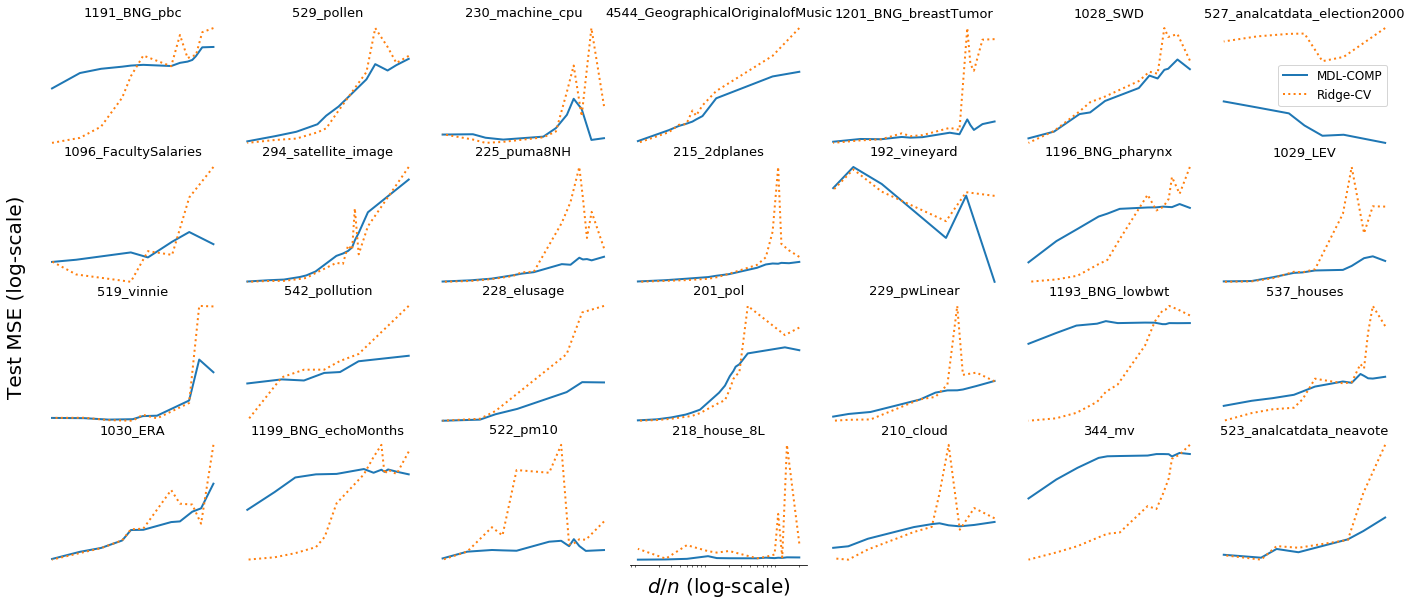

In [9]:
dsets = []
plot_all = False
R, C = 4, 7
# lets = ['A', 'B', 'C', 'D', 'E']
titles = {
    't': 'T-Distribution',
    'thresh': 'Thresholds',
    'decay': 'Decaying eigenvalues'
}
fig = plt.figure(figsize=(20, 8.5))
j = 0
for folder in folders: #, 'clustered', 'gaussian_scale_var']):
#     plt.title(lets[j], fontweight='bold', loc='left')    
    out_dir = oj(parent_dir, folder)
    df = pd.read_pickle(oj(out_dir, 'processed.pkl')).reset_index()
    dset_name = df['dset_name'].values[0]
    if dset_name not in data.REGRESSION_DSETS_LARGE_NAMES_RECOGNIZABLE:
        continue
    plt.subplot(R, C, j + 1)
#     plt.axhline(df.mse_zero.values[0], lw=4, color='gray', alpha=0.4, label='trivial')
    for i in range(df.shape[0]):
        curve = df.iloc[i]
    
        if curve.model_type == 'ridge' and curve.reg_param != -1:
            continue
        if curve.model_type == 'ols':
            continue
        l = str(curve.model_type) + str(curve.reg_param)
            

        if 'mdl' in curve.model_type:
            ls = '-'
        else:
            ls = ':'
        
        kwargs = {'label': LABS[l], 'alpha': 1, 'lw': 2, 'linestyle': ls}

    #     plt.plot(curve.ratio, curve.mse_test, 
        plt.plot(curve.ratio, curve.mse_test, **kwargs) #np.square(curve.bias) + curve['var'], **kwargs)
    if j == 0:
        plt.ylabel('Mean-squared error\n(test set)')
    plt.xlabel('d / n') #\n(Number of features / Number of training points)')
    plt.xscale('log')
    plt.yscale('log')

#     s = f'{model_type}_{dset}_{dset_name}+p={num_features}+lambda={reg_param}+noise_mult={noise_mult}'
    if j == C - 1:
        plt.legend()
    
    plt.title(dset_name, fontsize=13)
    plt.axis('off')
    j += 1

    
ax = plt.subplot(R, C, C * 2 + 1)    
plt.axis('on')
ax.set_yticks([])
plt.yscale('linear')
plt.ylabel('Test MSE (log-scale)', fontsize=20) #, labelpad=20) #, va='top')
ax.yaxis.set_label_coords(-0.1, 1.03)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax.set_yticks([])



ax = plt.subplot(R, C, R * (C - 1) + C//2 - 2)
plt.xlabel('$d/n$ (log-scale)', fontsize=20)
plt.axis('on')
plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.text(0, 1, 'Test MSE')

plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.savefig(oj(save_dir, 'fig_pmlb.pdf'))
# plt.show()